<a href="https://colab.research.google.com/github/SamuelOnyangoOmondi/Transfer-Learning/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning Inception V3 using Keras

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-sizing all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Transfer Learning /train'
valid_path = '/content/drive/MyDrive/Transfer Learning /test'

In [ ]:
# Importing the Vgg 16 library and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
# we are not training existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
 # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Transfer Learning /train/*')

In [ ]:
# our layers
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [ ]:
# telling the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Transfer Learning /train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Transfer Learning /test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [ ]:
# fitting the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-19-def28dee06bc>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
61/61 [==============================] - 703s 11s/step - loss: 2.4626 - accuracy: 0.7437 - val_loss: 0.0746 - val_accuracy: 0.9444
Epoch 2/20
61/61 [==============================] - 251s 4s/step - loss: 0.4975 - accuracy: 0.8908 - val_loss: 0.3928 - val_accuracy: 0.9444
Epoch 3/20
61/61 [==============================] - 247s 4s/step - loss: 0.6620 - accuracy: 0.8821 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 250s 4s/step - loss: 0.6356 - accuracy: 0.8975 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 5/20
61/61 [==============================] - 244s 4s/step - loss: 0.6084 - accuracy: 0.9057 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 250s 4s/step - loss: 0.4884 - accuracy: 0.9354 - val_loss: 0.1009 - val_accuracy: 0.9444
Epoch 7/20
61/61 [==============================] - 246s 4s/step - loss: 0.4721 - accuracy: 0.9303 - val_loss: 3.5908e-04 - val_accuracy: 1.0000
Epoch 8/

In [ ]:
import matplotlib.pyplot as plt

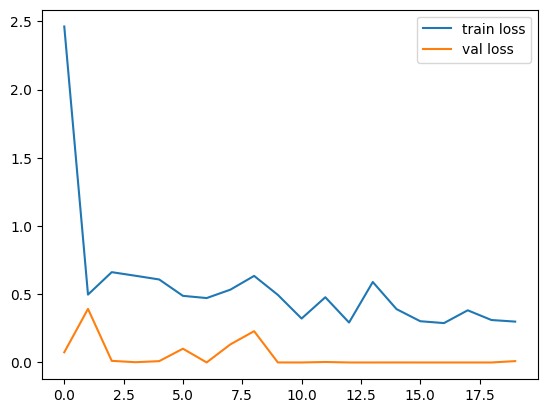

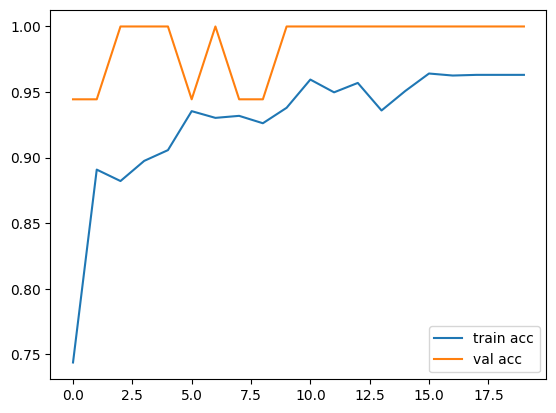

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [ ]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y_pred = model.predict(test_set)

1/1 [==============================] - 5s 5s/step


In [ ]:

y_pred

array([[3.06789212e-11, 1.61872295e-12, 9.99999940e-01, 5.61829542e-15],
       [6.45004991e-19, 0.00000000e+00, 9.99999940e-01, 2.87829967e-33],
       [1.48340044e-29, 9.99999940e-01, 3.26232233e-27, 9.55317183e-24],
       [1.38463840e-01, 6.96263024e-23, 8.61536145e-01, 4.21467555e-10],
       [2.43740804e-20, 7.48332868e-27, 3.82081368e-19, 9.99999940e-01],
       [9.99999940e-01, 2.29436747e-27, 3.45831085e-29, 1.18133136e-28],
       [9.99999940e-01, 0.00000000e+00, 3.96251139e-35, 1.35581792e-23],
       [2.78029190e-38, 9.99999940e-01, 0.00000000e+00, 0.00000000e+00],
       [1.56344545e-22, 9.99999940e-01, 1.00486604e-26, 3.10324957e-08],
       [1.22081201e-30, 1.30136781e-38, 1.39343970e-38, 9.99999940e-01],
       [2.23836947e-23, 7.30949199e-15, 1.63486205e-29, 9.99999940e-01],
       [0.00000000e+00, 1.22318754e-18, 0.00000000e+00, 9.99999940e-01],
       [0.00000000e+00, 9.99999940e-01, 0.00000000e+00, 7.26487781e-22],
       [1.24748725e-12, 2.46955827e-18, 9.70916510e

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:

y_pred

array([2, 2, 1, 2, 3, 0, 0, 1, 1, 3, 3, 3, 1, 2, 1, 3, 0, 2])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

OSError: No file or directory found at model_resnet50.h5

In [31]:
img_data


NameError: name 'img_data' is not defined